<a href="https://colab.research.google.com/github/sonG1031/ML_DL_STUDY/blob/main/%5BML%5D%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 전처리
- 머신러닝 모델에 훈련 데이터를 학습시키기 전에 가공하는 단계.  
데이터 전처리에 많은 시간이 소모되기도 함.  

### 브로드캐스팅
- 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능.

In [1]:
# 도미 + 빙어의 길이, 무게
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


**np.column_stack()** : 전달 받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결, 연결할 리스트는 튜플로 전달.
  
튜플로 전달하는 이유?  
튜플을 사용하면 함수로 전달한 값이 바뀌지 않는다는 것을 믿을 수 있기 때문에 매개변수 값으로 많이 사용함.

In [3]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


**np.concatenate()** : 전달 받은 리스를 연결함.
  
데이터가 아주 큰 경우에 파이썬 리스트로 작업하는 것은 비효율적이다.  
넘파이 배열은 핵심 부분이 C, C++과 같은 저수준 언어로 개발되어 빠르고,  
데이터 과학 분야에 알맞게 최적화 되어 있음.

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


**train_test_split()** : 훈련 데이터를 훈련 세트와 테스트 세트로 나누는 함수이고,
여러개의 배열을 전달할 수 있다.  
- test_size 매개변수에서 테스트 세트로 나눌 비율을 정할 수 있으며 기본값은 25%
- shuffle 매개변수로 데이터를 섞을지 여부를 결정할 수 있으며 기본값은 True
- stratify 매개변수에 클래스 레이블이 담긴 배열(일번적으로 타겟)을 전달하면 클래스 비율에 맞게 나눔.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [7]:
# 문제 발생!!
print(kn.predict([[25, 150]])) # 기댓값 : 1

[0.]


도미로 예측을 못하는 이유는?

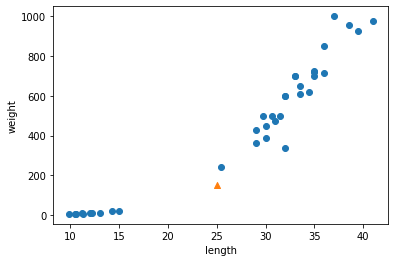

In [8]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
distances, indexes = kn.kneighbors([[25, 150]]) # 전달받은 샘플의 가장 가까운 이웃을 찾아줌. n_neighbors 개수만큼.
print(indexes)

[[21 33 19 30  1]]


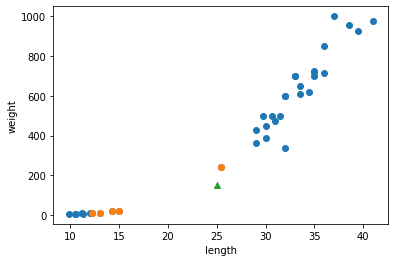

In [13]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이가 25cm, 무게가 150g인 생선에 가까운 이웃에는 빙어가 압도적으로 많기 때문.  
직관적으로 봤을땐 가장 가까운 이웃이 도미일 것 같은데, 왜?

In [19]:
print(distances)
print(train_target[indexes])
print(train_input[indexes])

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[1. 0. 0. 0. 0.]]
[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


가장 가까운 거리에 있는 샘플이 도미이고, 그 거리는 약 92 이다.  
그런데 두번쨰로 가까운 샘플의 거리가 약 130 이다??  
X축의 범위는 좁고, Y축의 범위는 넓기 떄문에 


In [21]:
# 두 점사이의 거리를 구하는 식
dx = (25 - 25.4) ** 2 # 0.08
dy = (150 - 242) ** 2 # 8464

print('target[1] : ', (dx + dy)**0.5) # (0.08 + 8464) ** 0.5

dx = (25 - 15) ** 2 # 100
dy = (150 - 19.9) ** 2 # 16926.01

print('target[0] : ', (dx + dy)**0.5) # (100 + 16926.01) ** 0.5

target[1] :  92.00086956110795
target[0] :  130.4837537780087


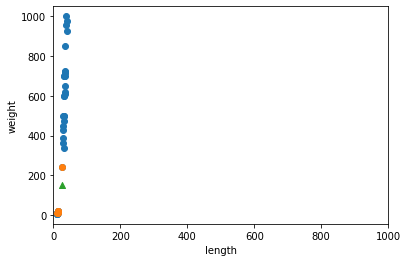

In [22]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.scatter(25, 150, marker='^')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위처럼 거리를 계산할때 y의 값의 영향이 큼.  

두 특성의 값이 놓인 범위가 매우 다름. 이를 두 특성의 **스케일(scale)**이 다르다고 표현함.  
Ex) 방의 넓이를 재는데 세로는 cm, 가로를 inch로 잰 것처럼~

데이터를 표현하느 기준이 다르면 알고리즘이 올바르게 예측할 수 없음.  
알고리즘이 거리 기반일 때 특히 그렇다.(k-최근접 이웃)  
이런 알고리즘들은 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면  
특성값을 **일정한 기준으로 맞춰야만 함!**  
이런 작업을 **데이터 전처리**라고 부름.

### 표준 점수(standard score, Z점수)
- 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄.  
- 가장 널리 사용되는 전처리 방법 중 하나
- 표준점수를 얻으려면 특성의 평균을 뺴고 표준편차로 나눔.
- 반드시 훈련 세트의 평균과 표준편차로 테스트 세트를 바꿔야함.

분산 : 평균값으로부터의 차이, 즉 편차의 제곱(양수로 만들기 위해서).  
표준편차 : 분산의 제곱근(편차의 제곱을 원래 단위로 돌리기 위해?). 

In [23]:
# 데이터 전처리

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
# axis= 0 : 열로 계산, axis=1 : 행으로 계산
# 각 특성의 스케일이 다르므로 특성끼리 표준점수를 계산해야함.
print(mean, std)

train_scaled = (train_input - mean) / std # 브로드캐스팅

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


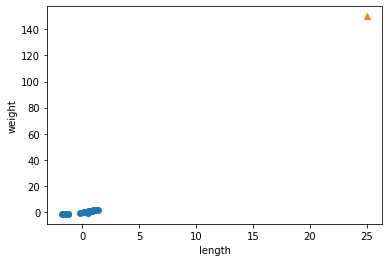

In [24]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^') # 전처리를 안한 데이터라 동떨어져 보임. 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

샘플 [25, 150]은 전처리를 안한 데이터라 동떨어져 보임.  
중요한 점은 훈련 세트의 mean, std를 이용해서 변환해야하 함(동일한 기준이여야 하므로).

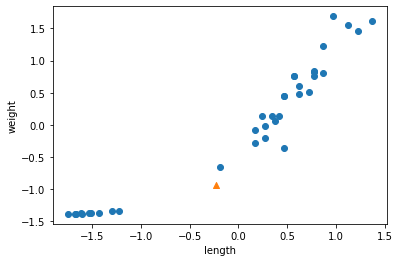

In [26]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^') 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

전처리를 통해 훈련 데이터의 두 특성이 비슷한 범위를 차지하게 됨(X축, Y축 확인).

In [29]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

print(kn.predict([new])) # 성공!!

[1.]


훈련 후 테스트 세트를 평가할 떄는 훈련 세트의 기준(평균, 표준편차)으로 테스트 세트를 변환해야함.

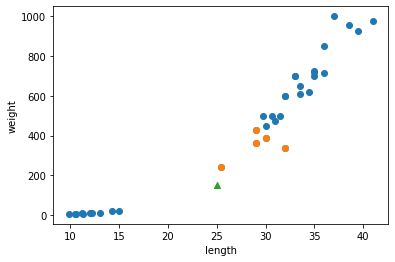

In [31]:
distances, indexes = kn.kneighbors([new]) 
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 특성을 표준점수로 바꾸었기 때문에 k-최근접 이웃 알고리즘이 올바르게 거리를 축정함.